### Classification project
#### Dataset Loan-applicant-details

#### Load libs necessary

In [2]:
# load libs manipulation data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# preprocessing data
from sklearn.model_selection import train_test_split

# metrics model 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
# load data

url = 'https://raw.githubusercontent.com/caiquemiranda/machine-learning-tiny-projects/main/data/loan_applicant_details.csv'
names = ['loan_ID', 'gender', 'married', 'dependents', 'education', 
        'self_employed', 'aplicant_income','coapplicant_income', 
        'loan_amount', 'loan_amount_term', 'credit_history', 'property_area',
        'loan_status' ]

dataset = pd.read_csv(url, names= names)

#### Viz and preprocessing data

In [4]:
# visual-data

dataset.head()

,loan_ID,gender,married,dependents,education,self_employed,aplicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y


In [5]:
# info-data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_ID             480 non-null    object 
 1   gender              480 non-null    object 
 2   married             480 non-null    object 
 3   dependents          480 non-null    object 
 4   education           480 non-null    object 
 5   self_employed       480 non-null    object 
 6   aplicant_income     480 non-null    int64  
 7   coapplicant_income  480 non-null    float64
 8   loan_amount         480 non-null    int64  
 9   loan_amount_term    480 non-null    int64  
 10  credit_history      480 non-null    int64  
 11  property_area       480 non-null    object 
 12  loan_status         480 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 48.9+ KB


In [6]:
# describe-data

dataset.describe()

,aplicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [7]:
# class distribution

dataset.groupby('loan_status').size()

loan_status
N    148
Y    332
dtype: int64

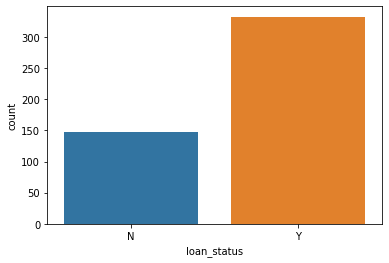

In [8]:
# viz-count class

sns.countplot(x='loan_status', data=dataset);

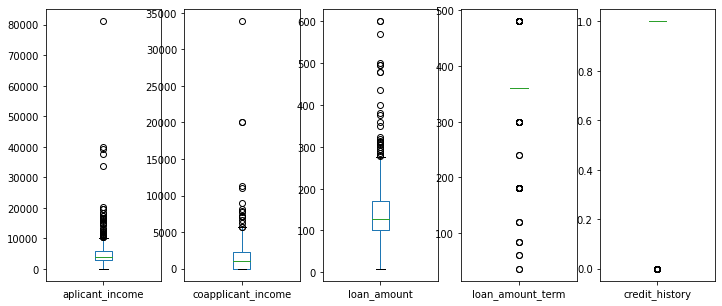

In [18]:
# viz-data boxplot

dataset.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(12, 5))
plt.show()

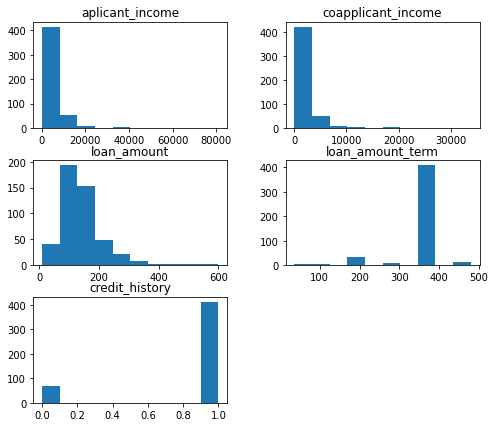

In [10]:
# viz-data histograms

dataset.hist(grid=False, figsize=(8, 7))
plt.show()

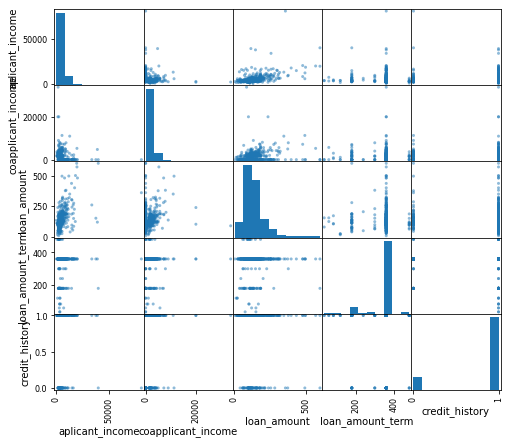

In [11]:
# viz-data scater plot matrix

scatter_matrix(dataset, figsize=(8, 7))
plt.show()

#### Training and evaluating the model

In [12]:
# split data

array = dataset.values
X = array[:, 6:11]            # featurs
y = array[:, 12]              # class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape    # return shape

((240, 5), (240, 5), (240,), (240,))

0.6833333333333333
              precision    recall  f1-score   support

           N       0.49      0.25      0.33        75
           Y       0.72      0.88      0.79       165

    accuracy                           0.68       240
   macro avg       0.60      0.57      0.56       240
weighted avg       0.65      0.68      0.65       240



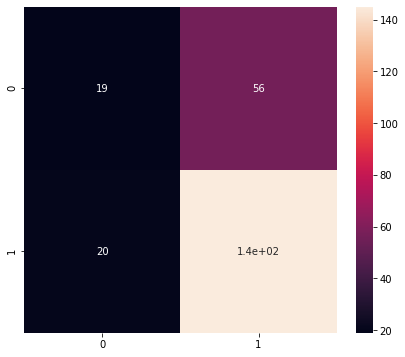

In [13]:
# k-neighbors model

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

predictions_knn = model_knn.predict(X_test)
print(accuracy_score(y_test, predictions_knn))
print(classification_report(y_test, predictions_knn))

plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, predictions_knn), annot=True);

0.6833333333333333
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        75
           Y       0.69      0.99      0.81       165

    accuracy                           0.68       240
   macro avg       0.34      0.50      0.41       240
weighted avg       0.47      0.68      0.56       240



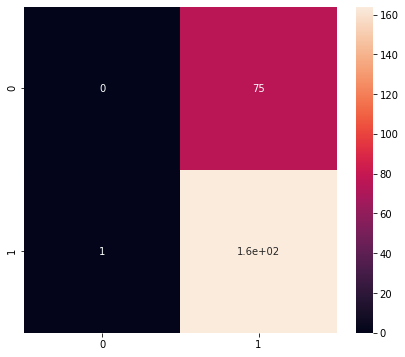

In [14]:
# svm model

model_svc = SVC()
model_svc.fit(X_train, y_train)

predictions_svc = model_svc.predict(X_test)
print(accuracy_score(y_test, predictions_svc))
print(classification_report(y_test, predictions_svc))

plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, predictions_svc), annot=True);

0.7708333333333334
              precision    recall  f1-score   support

           N       0.67      0.52      0.59        75
           Y       0.80      0.88      0.84       165

    accuracy                           0.77       240
   macro avg       0.74      0.70      0.71       240
weighted avg       0.76      0.77      0.76       240



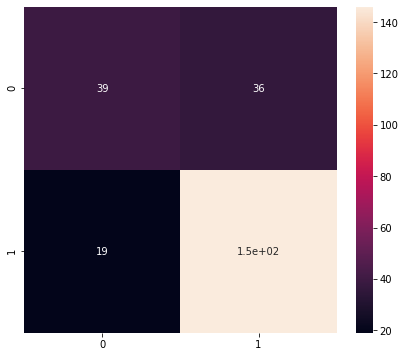

In [15]:
# random forest model

model_rf = RandomForestClassifier(n_estimators=5)
model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)
print(accuracy_score(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))

plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, predictions_rf), annot=True);

0.8041666666666667
              precision    recall  f1-score   support

           N       0.89      0.43      0.58        75
           Y       0.79      0.98      0.87       165

    accuracy                           0.80       240
   macro avg       0.84      0.70      0.72       240
weighted avg       0.82      0.80      0.78       240



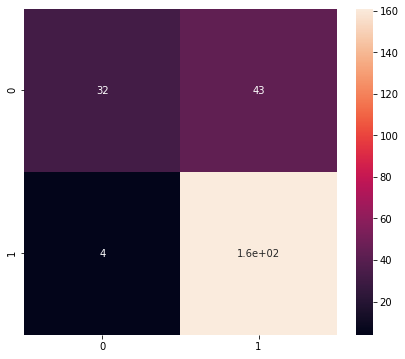

In [16]:
# logistic Regression model

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

predictions_lr = model_lr.predict(X_test)
print(accuracy_score(y_test, predictions_lr))
print(classification_report(y_test, predictions_lr))

plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, predictions_lr), annot=True);